In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [2]:
# File to Load 
mortality_data_to_load = "merged.csv"
physician_data_to_load = "Physicians_by_CMA.csv"

# Read the files and store into Pandas data frame
mortality_df = pd.read_csv(mortality_data_to_load)
physician_df = pd.read_csv(physician_data_to_load)

In [3]:
#mortality_df
physician_df


,Geography,GP/FP,Other Specialists,Total
0,"Abbotsford-Mission, British Columbia",199,135,334
1,"Barrie, Ontario",172,165,337
2,"Brantford, Ontario",109,90,199
3,"Calgary, Alberta",2094,2061,4155
4,"Edmonton, Alberta",1925,1897,3822
5,"Greater Sudbury, Ontario",199,183,382
6,"Guelph, Ontario",175,125,300
7,"Halifax, Nova Scotia",690,849,1539
8,"Hamilton, Ontario",849,1332,2181
9,"Kelowna, British Columbia",249,249,498


In [4]:
physician_df=physician_df.merge(mortality_df, on='Geography', how='outer')

In [5]:
final_df = physician_df[['Geography', 'GP/FP', 'Other Specialists', 'Total', 'population', 'Mortality Rate']]
final_df


,Geography,GP/FP,Other Specialists,Total,population,Mortality Rate
0,"Abbotsford-Mission, British Columbia",199,135,334,184021,0.680357
1,"Barrie, Ontario",172,165,337,202264,0.705019
2,"Brantford, Ontario",109,90,199,144109,0.929158
3,"Calgary, Alberta",2094,2061,4155,1432169,0.464680
4,"Edmonton, Alberta",1925,1897,3822,1358345,0.601688
5,"Greater Sudbury, Ontario",199,183,382,165261,1.027466
6,"Guelph, Ontario",175,125,300,153290,0.702590
7,"Halifax, Nova Scotia",690,849,1539,416824,0.752356
8,"Hamilton, Ontario",849,1332,2181,769853,0.873543
9,"Kelowna, British Columbia",249,249,498,195305,0.879138


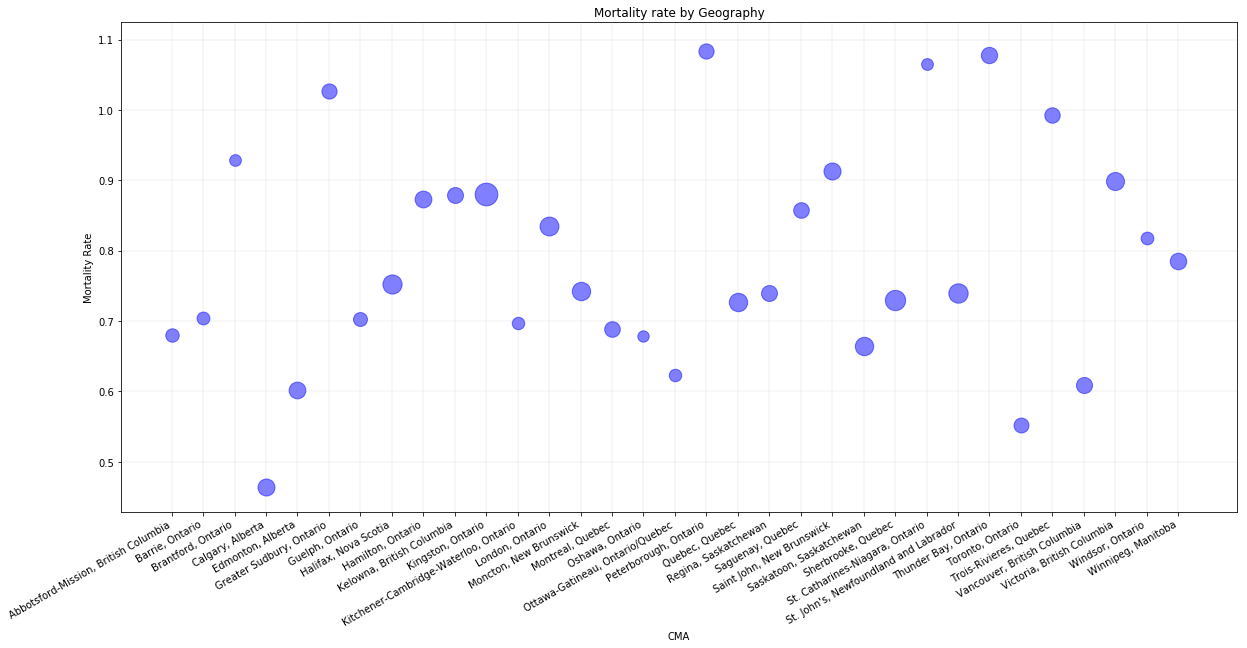

In [7]:
#Scatterplot of Mortality by City and all physicians

#Define variables
y = final_df['Mortality Rate']
x = final_df['Geography']
fig, ax = plt.subplots(figsize=(20,10))

for i in range (len(final_df)):
        
    #plot each dot and change the size based on number of hospitals
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue", s=final_df['Total'][i]/final_df['population'][i]*100000)

#add labels
plt.title(f"Mortality rate by Geography")
plt.ylabel('Mortality Rate')
plt.xlabel('CMA')
fig.autofmt_xdate()   

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

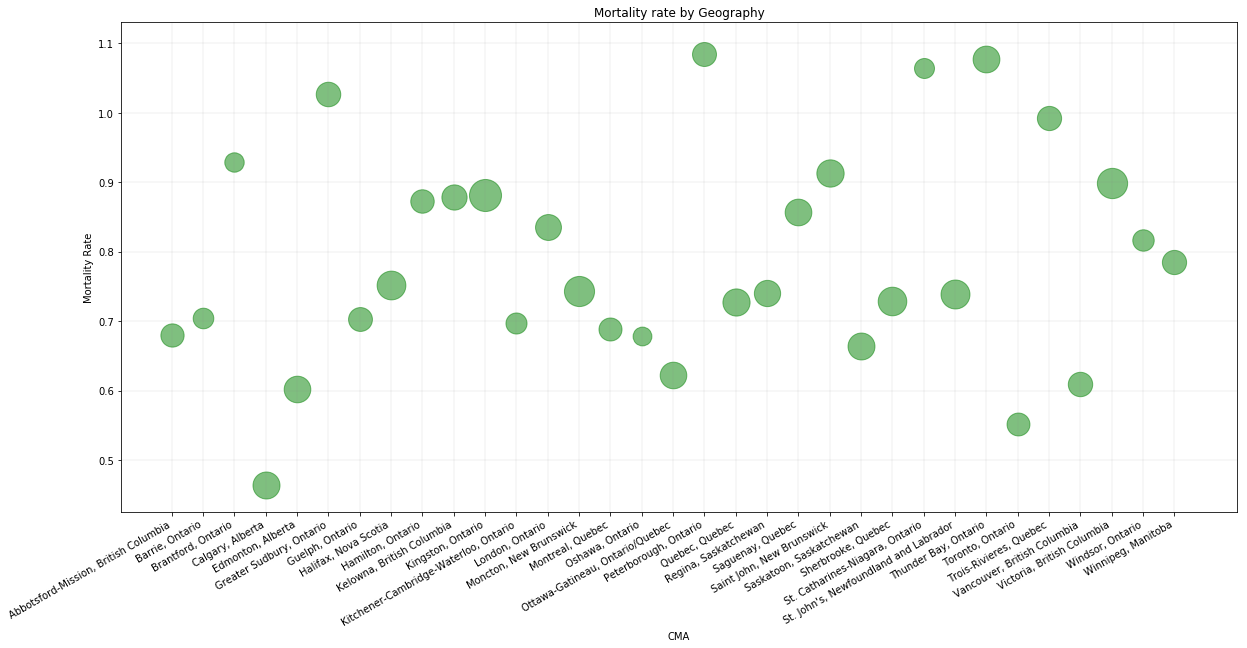

In [9]:
#Scatterplot of Mortality by City and GP/FP physicians

#Define variables
y = final_df['Mortality Rate']
x = final_df['Geography']
fig, ax = plt.subplots(figsize=(20,10))

for i in range (len(final_df)):
        
    #plot each dot and change the size based on number of hospitals
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="green", s=final_df['GP/FP'][i]/final_df['population'][i]*500000)

#add labels
plt.title(f"Mortality rate by Geography")
plt.ylabel('Mortality Rate')
plt.xlabel('CMA')
fig.autofmt_xdate()   

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

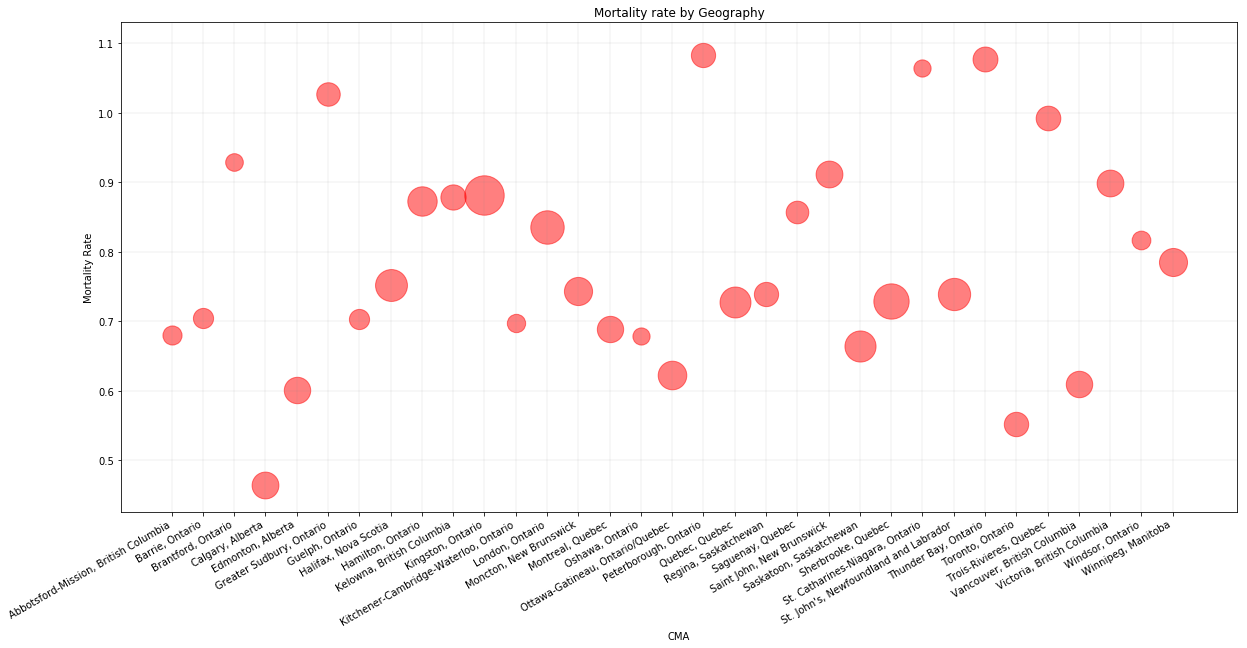

In [11]:
#Scatterplot of Mortality by City and specialists physicians

#Define variables
y = final_df['Mortality Rate']
x = final_df['Geography']
fig, ax = plt.subplots(figsize=(20,10))

for i in range (len(final_df)):
        
    #plot each dot and change the size based on number of hospitals
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="red", s=final_df['Other Specialists'][i]/final_df['population'][i]*500000)

#add labels
plt.title(f"Mortality rate by Geography")
plt.ylabel('Mortality Rate')
plt.xlabel('CMA')
fig.autofmt_xdate()   

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)